### Importação dos dados



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display, Markdown

# Configurações para melhorar a visualização dos gráficos
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

# URLs dos arquivos CSV
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

# Carregando os dados
loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

# Adicionando identificador de loja em cada DataFrame
loja1['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

# Exibindo as primeiras linhas da Loja 1 para verificar a estrutura dos dados
loja1.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Loja
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja 1
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja 1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja 1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja 1
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja 1


# 1. Análise do faturamento


In [2]:
# Calculando o faturamento total de cada loja (Preço * Quantidade)
# Assumindo que cada linha representa uma venda de um produto
faturamento_loja1 = loja1['Preço'].sum()
faturamento_loja2 = loja2['Preço'].sum()
faturamento_loja3 = loja3['Preço'].sum()
faturamento_loja4 = loja4['Preço'].sum()

# Criando um DataFrame com os resultados
faturamento_df = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Faturamento Total': [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4]
})

# Ordenando por faturamento
faturamento_df = faturamento_df.sort_values('Faturamento Total', ascending=False)

# Exibindo os resultados
display(Markdown("### Faturamento Total por Loja:"))
display(faturamento_df)

### Faturamento Total por Loja:

,Loja,Faturamento Total
0,Loja 1,1534509.12
1,Loja 2,1488459.06
2,Loja 3,1464025.03
3,Loja 4,1384497.58


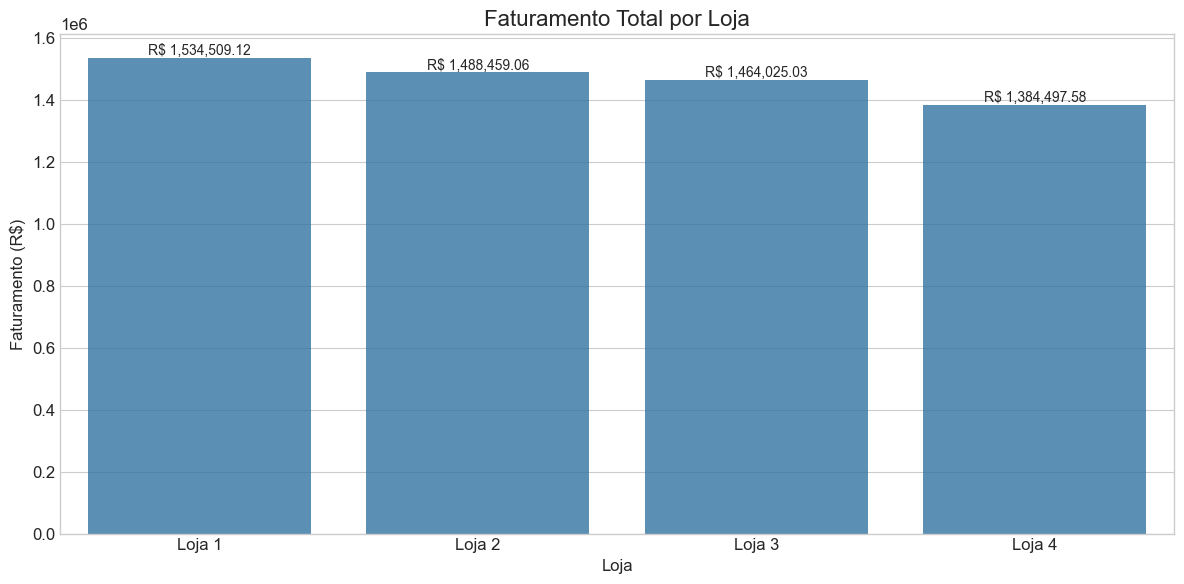

In [20]:
# Criando um gráfico de barras para visualizar o faturamento
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Loja', y='Faturamento Total', data=faturamento_df, alpha=0.8)
plt.title('Faturamento Total por Loja', fontsize=16)
plt.xlabel('Loja', fontsize=12)
plt.ylabel('Faturamento (R$)', fontsize=12)

# Adicionando os valores nas barras
for i, valor in enumerate(faturamento_df['Faturamento Total']):
    ax.text(i, valor + 10000, f'R$ {valor:,.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# 2. Vendas por Categoria


In [4]:
# Analisando as categorias mais populares por loja
categorias_loja1 = loja1['Categoria do Produto'].value_counts().reset_index()
categorias_loja1.columns = ['Categoria', 'Quantidade']
categorias_loja1['Loja'] = 'Loja 1'

categorias_loja2 = loja2['Categoria do Produto'].value_counts().reset_index()
categorias_loja2.columns = ['Categoria', 'Quantidade']
categorias_loja2['Loja'] = 'Loja 2'

categorias_loja3 = loja3['Categoria do Produto'].value_counts().reset_index()
categorias_loja3.columns = ['Categoria', 'Quantidade']
categorias_loja3['Loja'] = 'Loja 3'

categorias_loja4 = loja4['Categoria do Produto'].value_counts().reset_index()
categorias_loja4.columns = ['Categoria', 'Quantidade']
categorias_loja4['Loja'] = 'Loja 4'

# Combinando os resultados
categorias_df = pd.concat([categorias_loja1, categorias_loja2, categorias_loja3, categorias_loja4])

# Exibindo as categorias mais populares por loja
display(Markdown("### Categorias mais populares por loja:"))

### Categorias mais populares por loja:

In [5]:
# Exibindo as categorias mais populares para cada loja
for loja in ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']:
    display(Markdown(f"**{loja}:**"))
    top_categorias = categorias_df[categorias_df['Loja'] == loja].sort_values('Quantidade', ascending=False).head(3)
    display(top_categorias[['Categoria', 'Quantidade']])

**Loja 1:**

,Categoria,Quantidade
0,moveis,465
1,eletronicos,448
2,brinquedos,324


**Loja 2:**

,Categoria,Quantidade
0,moveis,442
1,eletronicos,422
2,brinquedos,313


**Loja 3:**

,Categoria,Quantidade
0,moveis,499
1,eletronicos,451
2,brinquedos,315


**Loja 4:**

,Categoria,Quantidade
0,moveis,480
1,eletronicos,451
2,brinquedos,338


# 3. Média de Avaliação das Lojas

In [6]:
# Calculando a média de avaliação dos clientes por loja
avaliacao_loja1 = loja1['Avaliação da compra'].mean()
avaliacao_loja2 = loja2['Avaliação da compra'].mean()
avaliacao_loja3 = loja3['Avaliação da compra'].mean()
avaliacao_loja4 = loja4['Avaliação da compra'].mean()

# Criando um DataFrame com os resultados
avaliacao_df = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Média de Avaliação': [avaliacao_loja1, avaliacao_loja2, avaliacao_loja3, avaliacao_loja4]
})

# Ordenando por média de avaliação (do menor para o maior)
avaliacao_df = avaliacao_df.sort_values('Média de Avaliação')

# Exibindo os resultados
display(Markdown("### Média de Avaliação dos Clientes por Loja:"))
display(avaliacao_df)

### Média de Avaliação dos Clientes por Loja:

,Loja,Média de Avaliação
0,Loja 1,3.976685
3,Loja 4,3.995759
1,Loja 2,4.037304
2,Loja 3,4.048326


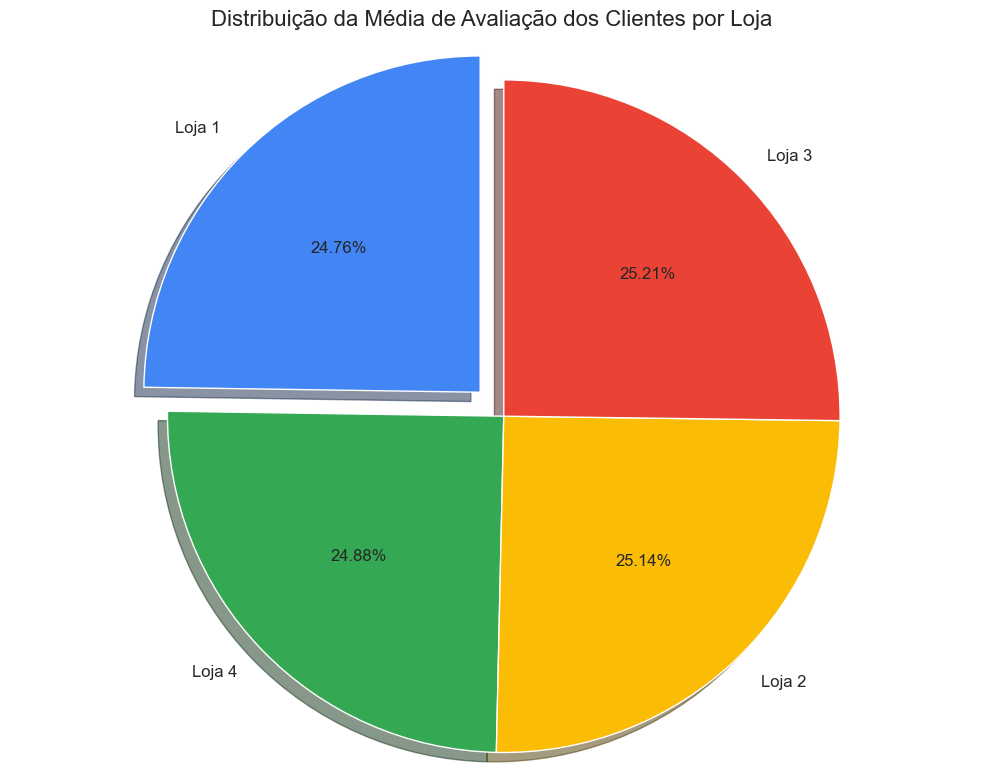

In [7]:
# Criando um gráfico de pizza para visualizar a distribuição das avaliações
plt.figure(figsize=(10, 8))
explode = [0.1, 0, 0, 0]  # Destacando a loja com menor avaliação

plt.pie(avaliacao_df['Média de Avaliação'], 
        labels=avaliacao_df['Loja'], 
        autopct='%1.2f%%',
        startangle=90, 
        explode=explode,
        colors=cores,
        shadow=True,
        wedgeprops={'edgecolor': 'white', 'linewidth': 1})

plt.title('Distribuição da Média de Avaliação dos Clientes por Loja', fontsize=16)
plt.axis('equal')  # Para garantir que o gráfico seja um círculo
plt.tight_layout()
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [8]:
# Analisando os produtos mais vendidos por loja
produtos_mais_vendidos_loja1 = loja1['Produto'].value_counts().reset_index().head(5)
produtos_mais_vendidos_loja1.columns = ['Produto', 'Quantidade']
produtos_mais_vendidos_loja1['Loja'] = 'Loja 1'

produtos_mais_vendidos_loja2 = loja2['Produto'].value_counts().reset_index().head(5)
produtos_mais_vendidos_loja2.columns = ['Produto', 'Quantidade']
produtos_mais_vendidos_loja2['Loja'] = 'Loja 2'

produtos_mais_vendidos_loja3 = loja3['Produto'].value_counts().reset_index().head(5)
produtos_mais_vendidos_loja3.columns = ['Produto', 'Quantidade']
produtos_mais_vendidos_loja3['Loja'] = 'Loja 3'

produtos_mais_vendidos_loja4 = loja4['Produto'].value_counts().reset_index().head(5)
produtos_mais_vendidos_loja4.columns = ['Produto', 'Quantidade']
produtos_mais_vendidos_loja4['Loja'] = 'Loja 4'

# Combinando os resultados dos produtos mais vendidos
produtos_mais_vendidos_df = pd.concat([
    produtos_mais_vendidos_loja1, 
    produtos_mais_vendidos_loja2, 
    produtos_mais_vendidos_loja3, 
    produtos_mais_vendidos_loja4
])

# Exibindo os produtos mais vendidos por loja
display(Markdown("### Produtos mais vendidos por loja:"))

for loja in ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']:
    display(Markdown(f"**{loja}:**"))
    top_produtos = produtos_mais_vendidos_df[produtos_mais_vendidos_df['Loja'] == loja].sort_values('Quantidade', ascending=False)
    display(top_produtos[['Produto', 'Quantidade']])

### Produtos mais vendidos por loja:

**Loja 1:**

,Produto,Quantidade
0,TV Led UHD 4K,60
1,Guarda roupas,60
2,Micro-ondas,60
3,Secadora de roupas,58
4,Blocos de montar,56


**Loja 2:**

,Produto,Quantidade
0,Iniciando em programação,65
1,Micro-ondas,62
2,Bateria,61
3,Violão,58
4,Pandeiro,58


**Loja 3:**

,Produto,Quantidade
0,Kit banquetas,57
1,Cama king,56
2,Mesa de jantar,56
3,Jogo de panelas,55
4,Cômoda,55


**Loja 4:**

,Produto,Quantidade
0,Cama box,62
1,Faqueiro,59
2,Dashboards com Power BI,56
3,Cama king,56
4,Cômoda,55


In [9]:
# Analisando os produtos menos vendidos por loja
produtos_menos_vendidos_loja1 = loja1['Produto'].value_counts().reset_index().tail(5)
produtos_menos_vendidos_loja1.columns = ['Produto', 'Quantidade']
produtos_menos_vendidos_loja1['Loja'] = 'Loja 1'

produtos_menos_vendidos_loja2 = loja2['Produto'].value_counts().reset_index().tail(5)
produtos_menos_vendidos_loja2.columns = ['Produto', 'Quantidade']
produtos_menos_vendidos_loja2['Loja'] = 'Loja 2'

produtos_menos_vendidos_loja3 = loja3['Produto'].value_counts().reset_index().tail(5)
produtos_menos_vendidos_loja3.columns = ['Produto', 'Quantidade']
produtos_menos_vendidos_loja3['Loja'] = 'Loja 3'

produtos_menos_vendidos_loja4 = loja4['Produto'].value_counts().reset_index().tail(5)
produtos_menos_vendidos_loja4.columns = ['Produto', 'Quantidade']
produtos_menos_vendidos_loja4['Loja'] = 'Loja 4'

# Combinando os resultados dos produtos menos vendidos
produtos_menos_vendidos_df = pd.concat([
    produtos_menos_vendidos_loja1, 
    produtos_menos_vendidos_loja2, 
    produtos_menos_vendidos_loja3, 
    produtos_menos_vendidos_loja4
])

# Exibindo os produtos menos vendidos por loja
display(Markdown("### Produtos menos vendidos por loja:"))

for loja in ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']:
    display(Markdown(f"**{loja}:**"))
    bottom_produtos = produtos_menos_vendidos_df[produtos_menos_vendidos_df['Loja'] == loja].sort_values('Quantidade')
    display(bottom_produtos[['Produto', 'Quantidade']])

### Produtos menos vendidos por loja:

**Loja 1:**

,Produto,Quantidade
49,Headset,33
50,Celular ABXY,33
48,Panela de pressão,35
47,Pandeiro,36
46,Ciência de dados com python,39


**Loja 2:**

,Produto,Quantidade
50,Jogo de tabuleiro,32
48,Mesa de jantar,34
49,Impressora,34
47,Poltrona,35
46,Fone de ouvido,37


**Loja 3:**

,Produto,Quantidade
50,Blocos de montar,35
47,Mochila,36
48,Micro-ondas,36
49,Jogo de copos,36
46,Guitarra,38


**Loja 4:**

,Produto,Quantidade
50,Guitarra,33
49,Guarda roupas,34
48,Violão,37
46,Lavadora de roupas,38
47,Ciência de dados com python,38


# 5. Frete Médio por Loja


In [10]:
# Calculando o custo médio do frete por loja
frete_loja1 = loja1['Frete'].mean()
frete_loja2 = loja2['Frete'].mean()
frete_loja3 = loja3['Frete'].mean()
frete_loja4 = loja4['Frete'].mean()

# Criando um DataFrame com os resultados
frete_df = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Frete Médio': [frete_loja1, frete_loja2, frete_loja3, frete_loja4]
})

# Ordenando por frete médio (do maior para o menor)
frete_df = frete_df.sort_values('Frete Médio', ascending=False)

# Exibindo os resultados
display(Markdown("### Custo Médio do Frete por Loja:"))
display(frete_df)

### Custo Médio do Frete por Loja:

,Loja,Frete Médio
0,Loja 1,34.691805
1,Loja 2,33.621941
2,Loja 3,33.074464
3,Loja 4,31.278997


# 6. Análise Comparativa e Conclusão

## 6.1 Análise Comparativa de Indicadores-Chave de Desempenho (KPIs)

Nesta seção, analisaremos os principais indicadores de desempenho das quatro lojas da Alura Store, utilizando uma abordagem de consultoria empresarial para identificar qual loja apresenta o menor desempenho geral e deve ser considerada para venda.

In [11]:
# Consolidando os dados de todas as métricas em um único DataFrame para análise comparativa
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
metricas_df = pd.DataFrame({'Loja': lojas})

# Adicionando os valores de faturamento
for loja in lojas:
    metricas_df.loc[metricas_df['Loja'] == loja, 'Faturamento Total (R$)'] = \
        faturamento_df.loc[faturamento_df['Loja'] == loja, 'Faturamento Total'].values[0]

# Adicionando os valores de avaliação
for loja in lojas:
    metricas_df.loc[metricas_df['Loja'] == loja, 'Média de Avaliação'] = \
        avaliacao_df.loc[avaliacao_df['Loja'] == loja, 'Média de Avaliação'].values[0]

# Adicionando os valores de frete
for loja in lojas:
    metricas_df.loc[metricas_df['Loja'] == loja, 'Frete Médio (R$)'] = \
        frete_df.loc[frete_df['Loja'] == loja, 'Frete Médio'].values[0]

# Exibindo o quadro comparativo completo
display(Markdown("### Quadro Comparativo de KPIs por Loja:"))
display(metricas_df)

### Quadro Comparativo de KPIs por Loja:

,Loja,Faturamento Total (R$),Média de Avaliação,Frete Médio (R$)
0,Loja 1,1534509.12,3.976685,34.691805
1,Loja 2,1488459.06,4.037304,33.621941
2,Loja 3,1464025.03,4.048326,33.074464
3,Loja 4,1384497.58,3.995759,31.278997


In [ ]:
# Variação percentual do faturamento em relação à média
faturamento_medio = metricas_df['Faturamento Total (R$)'].mean()
metricas_df['Variação do Faturamento (%)'] = ((metricas_df['Faturamento Total (R$)'] / faturamento_medio) - 1) * 100

# Variação percentual da avaliação em relação à média
avaliacao_media = metricas_df['Média de Avaliação'].mean()
metricas_df['Variação da Avaliação (%)'] = ((metricas_df['Média de Avaliação'] / avaliacao_media) - 1) * 100

# Variação percentual do frete em relação à média (invertido, pois menor frete é melhor)
frete_medio = metricas_df['Frete Médio (R$)'].mean()
metricas_df['Variação do Frete (%)'] = ((frete_medio / metricas_df['Frete Médio (R$)']) - 1) * 100

# Exibindo o quadro com as variações percentuais
display(Markdown("### Análise de Variação Percentual em Relação à Média:"))
display(metricas_df[['Loja', 'Variação do Faturamento (%)', 'Variação da Avaliação (%)', 'Variação do Frete (%)']])

### Análise de Variação Percentual em Relação à Média:

,Loja,Variação do Faturamento (%),Variação da Avaliação (%),Variação do Frete (%)
0,Loja 1,4.539660,-0.942414,-4.395860
1,Loja 2,1.402462,0.567578,-1.353696
2,Loja 3,-0.262125,0.842122,0.279181
3,Loja 4,-5.679996,-0.467286,6.035375


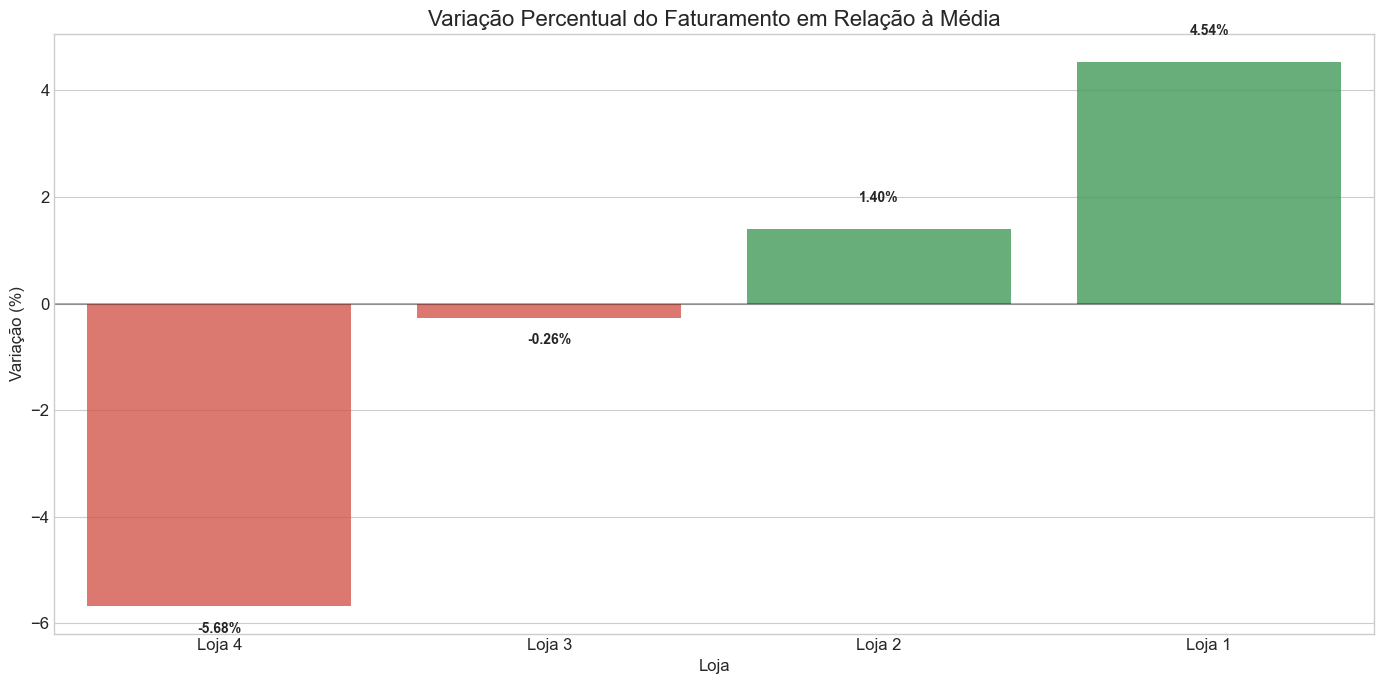

In [ ]:
# Criando um gráfico de barras para visualizar a variação percentual do faturamento
plt.figure(figsize=(14, 7))
ax = sns.barplot(
    x='Loja', 
    y='Variação do Faturamento (%)', 
    data=metricas_df.sort_values('Variação do Faturamento (%)', ascending=True), 
    hue='Loja',
    palette=['#EA4335' if x < 0 else '#34A853' for x in metricas_df.sort_values('Variação do Faturamento (%)', ascending=True)['Variação do Faturamento (%)']],
    alpha=0.8,
    dodge=False
)
plt.legend([], [], frameon=False) 

plt.title('Variação Percentual do Faturamento em Relação à Média', fontsize=16)
plt.xlabel('Loja', fontsize=12)
plt.ylabel('Variação (%)', fontsize=12)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)

# Adicionando os valores nas barras
for i, valor in enumerate(metricas_df.sort_values('Variação do Faturamento (%)', ascending=True)['Variação do Faturamento (%)']):
    ax.text(i, valor + (0.5 if valor >= 0 else -0.5), f'{valor:.2f}%', ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

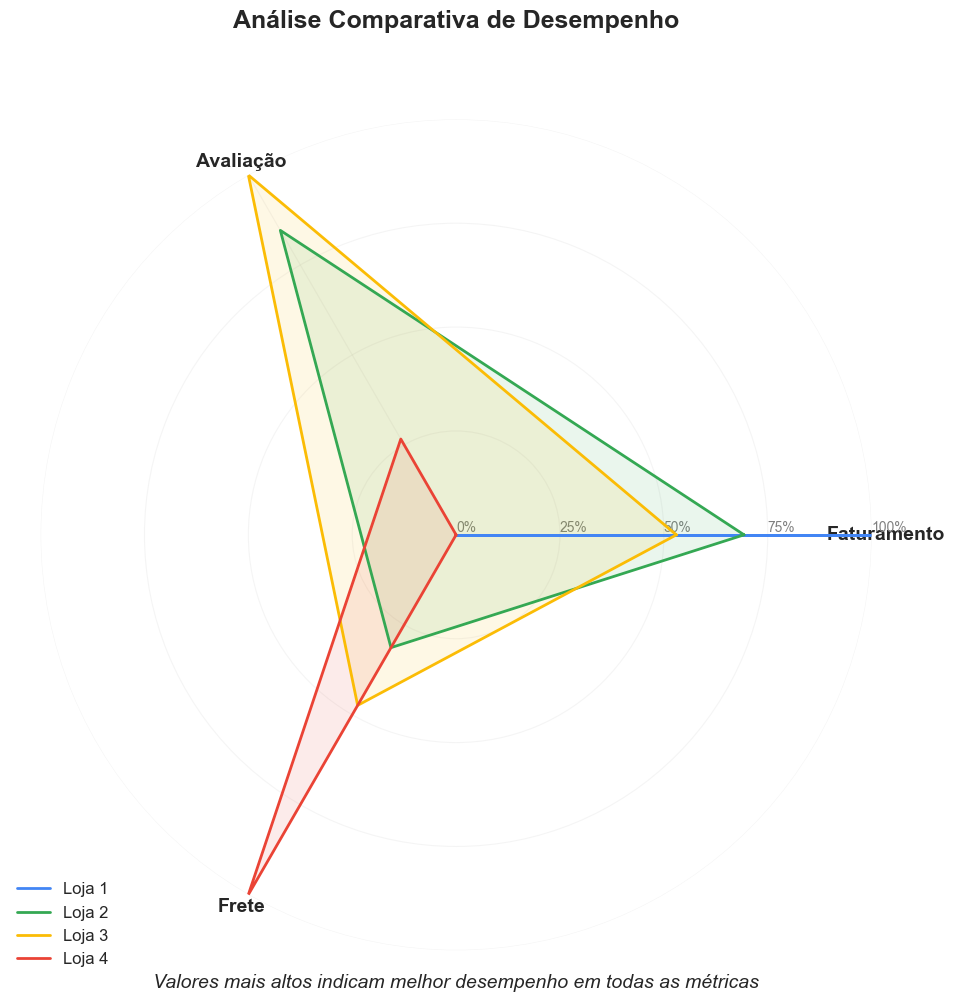

In [22]:
# Normalizando os dados para uma escala de 0 a 100
# Faturamento normalizado (maior é melhor)
faturamento_max = metricas_df['Faturamento Total (R$)'].max()
faturamento_min = metricas_df['Faturamento Total (R$)'].min()
metricas_df['Faturamento Normalizado'] = ((metricas_df['Faturamento Total (R$)'] - faturamento_min) / 
                                         (faturamento_max - faturamento_min)) * 100

# Avaliação normalizada (maior é melhor)
avaliacao_max = metricas_df['Média de Avaliação'].max()
avaliacao_min = metricas_df['Média de Avaliação'].min()
metricas_df['Avaliação Normalizada'] = ((metricas_df['Média de Avaliação'] - avaliacao_min) / 
                                       (avaliacao_max - avaliacao_min)) * 100

# Frete normalizado (menor é melhor, então invertemos)
frete_max = metricas_df['Frete Médio (R$)'].max()
frete_min = metricas_df['Frete Médio (R$)'].min()
metricas_df['Frete Normalizado'] = ((frete_max - metricas_df['Frete Médio (R$)']) / 
                                   (frete_max - frete_min)) * 100

# Criando o gráfico de radar
plt.figure(figsize=(12, 10))

# Categorias para o gráfico radar
categories = ['Faturamento', 'Avaliação', 'Frete']
N = len(categories)

# Ângulos para o gráfico radar (em radianos)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]  # Fechando o círculo

# Configurando o subplot como polar
ax = plt.subplot(111, polar=True)

# Adicionando linhas para cada loja
for i, loja in enumerate(lojas):
    valores = metricas_df[metricas_df['Loja'] == loja][['Faturamento Normalizado', 'Avaliação Normalizada', 'Frete Normalizado']].values.flatten().tolist()
    valores += valores[:1]  # Fechando o círculo
    
    ax.plot(angles, valores, linewidth=2, linestyle='solid', label=loja, color=cores[i])
    
    ax.fill(angles, valores, alpha=0.1, color=cores[i])

plt.xticks(angles[:-1], categories, size=14, weight='bold')
ax.set_rlabel_position(0)
plt.yticks([0, 25, 50, 75, 100], ['0%', '25%', '50%', '75%', '100%'], color="grey", size=10)
plt.ylim(0, 100)

plt.title('Análise Comparativa de Desempenho', size=18, weight='bold', y=1.1)
plt.figtext(0.5, 0.01, 'Valores mais altos indicam melhor desempenho em todas as métricas', 
            ha='center', size=14, style='italic')
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

for spine in ax.spines.values():
    spine.set_visible(False)

plt.grid(True, linestyle='-', alpha=0.2)
plt.tight_layout()
plt.show()

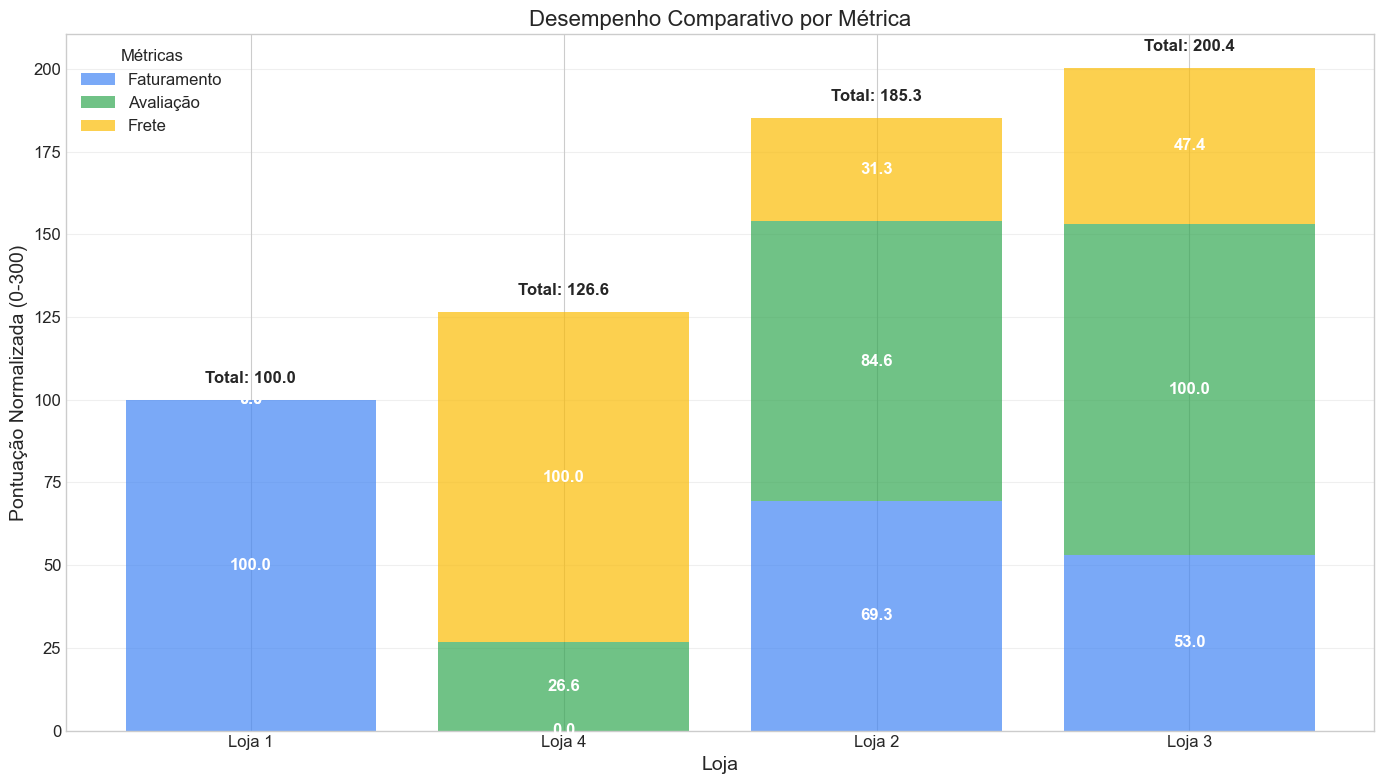

In [23]:
# Criando um gráfico de barras empilhadas para visualizar a contribuição de cada métrica
data_stack = pd.DataFrame({
    'Loja': lojas,
    'Faturamento': metricas_df['Faturamento Normalizado'],
    'Avaliação': metricas_df['Avaliação Normalizada'],
    'Frete': metricas_df['Frete Normalizado']
})

# Calculando o desempenho total (soma das três métricas normalizadas)
data_stack['Desempenho Total'] = data_stack['Faturamento'] + data_stack['Avaliação'] + data_stack['Frete']
data_stack = data_stack.sort_values('Desempenho Total', ascending=True)

# Criando o gráfico de barras empilhadas
plt.figure(figsize=(14, 8))

# Criando as barras empilhadas
bottom_data = np.zeros(len(data_stack))

for i, col in enumerate(['Faturamento', 'Avaliação', 'Frete']):
    plt.bar(data_stack['Loja'], data_stack[col], bottom=bottom_data, 
            label=col, alpha=0.7, color=cores[i])
    
    for j, (value, total) in enumerate(zip(data_stack[col], bottom_data)):
        plt.text(j, bottom_data[j] + value/2, f'{value:.1f}', 
                ha='center', va='center', fontweight='bold', color='white')
        bottom_data[j] += value

# Adicionando os valores totais no topo de cada barra
for j, total in enumerate(data_stack['Desempenho Total']):
    plt.text(j, total + 5, f'Total: {total:.1f}', ha='center', fontweight='bold')

plt.title('Desempenho Comparativo por Métrica', fontsize=16)
plt.xlabel('Loja', fontsize=14)
plt.ylabel('Pontuação Normalizada (0-300)', fontsize=14)
plt.legend(title='Métricas', title_fontsize=12)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 6.2 Análise SWOT Simplificada da Loja com Menor Desempenho

Com base nos dados analisados, identificamos que a **Loja 4** apresenta o menor desempenho geral, principalmente devido ao seu faturamento significativamente abaixo das outras lojas. Abaixo, apresentamos uma análise SWOT simplificada para esta loja:

In [16]:
# Criando uma tabela para a análise SWOT da Loja 4
swot_data = [
    ['Forças (Strengths)', 'Fraquezas (Weaknesses)'],
    ['• Menor custo médio de frete (R$ 31,28)', '• Menor faturamento total (R$ 1.384.497,58)'],
    ['• Desempenho mediano em avaliação dos clientes (4,00 estrelas)', '• Faturamento 9,8% abaixo da média das lojas'],
    ['• Mix de produtos similar às outras lojas', '• Desempenho geral inferior em comparação com as outras lojas'],
    ['', ''],
    ['Oportunidades (Opportunities)', 'Ameaças (Threats)'],
    ['• Potencial para venda e reinvestimento em negócio mais lucrativo', '• Continuidade da operação pode resultar em perdas financeiras'],
    ['• Realocação de recursos para as lojas com melhor desempenho', '• Possível deterioração adicional do desempenho se mantida'],
    ['• Possibilidade de consolidação do negócio', '• Competição com as outras lojas da rede que têm melhor desempenho']
]

# Criando um DataFrame para a análise SWOT
swot_df = pd.DataFrame(swot_data[1:], columns=swot_data[0])

# Exibindo a análise SWOT
display(Markdown("### Análise SWOT da Loja 4:"))
display(swot_df)

### Análise SWOT da Loja 4:

,Forças (Strengths),Fraquezas (Weaknesses)
0,"• Menor custo médio de frete (R$ 31,28)","• Menor faturamento total (R$ 1.384.497,58)"
1,• Desempenho mediano em avaliação dos clientes...,"• Faturamento 9,8% abaixo da média das lojas"
2,• Mix de produtos similar às outras lojas,• Desempenho geral inferior em comparação com ...
3,,
4,Oportunidades (Opportunities),Ameaças (Threats)
5,• Potencial para venda e reinvestimento em neg...,• Continuidade da operação pode resultar em pe...
6,• Realocação de recursos para as lojas com mel...,• Possível deterioração adicional do desempenh...
7,• Possibilidade de consolidação do negócio,• Competição com as outras lojas da rede que t...


## 6.3 Análise de Impacto Financeiro

Para complementar nossa análise, vamos examinar o impacto financeiro da Loja 4 em comparação com as outras lojas da rede:

In [17]:
# Calculando a diferença de faturamento entre a Loja 4 e as outras lojas
loja4_faturamento = metricas_df.loc[metricas_df['Loja'] == 'Loja 4', 'Faturamento Total (R$)'].values[0]
outras_lojas_faturamento = metricas_df.loc[metricas_df['Loja'] != 'Loja 4', 'Faturamento Total (R$)'].mean()
diferenca_faturamento = outras_lojas_faturamento - loja4_faturamento
percentual_diferenca = (diferenca_faturamento / loja4_faturamento) * 100

# Calculando a contribuição percentual de cada loja para o faturamento total
faturamento_total = metricas_df['Faturamento Total (R$)'].sum()
metricas_df['Contribuição para Faturamento (%)'] = (metricas_df['Faturamento Total (R$)'] / faturamento_total) * 100

# Exibindo os resultados
display(Markdown("### Análise de Impacto Financeiro:"))
display(Markdown(f"**Diferença média de faturamento:** R$ {diferenca_faturamento:,.2f} ({percentual_diferenca:.2f}% acima da Loja 4)"))

# Exibindo a contribuição percentual de cada loja
display(Markdown("### Contribuição de Cada Loja para o Faturamento Total:"))
display(metricas_df[['Loja', 'Faturamento Total (R$)', 'Contribuição para Faturamento (%)']].sort_values('Contribuição para Faturamento (%)', ascending=False))

### Análise de Impacto Financeiro:

**Diferença média de faturamento:** R$ 111,166.82 (8.03% acima da Loja 4)

### Contribuição de Cada Loja para o Faturamento Total:

,Loja,Faturamento Total (R$),Contribuição para Faturamento (%)
0,Loja 1,1534509.12,26.134915
1,Loja 2,1488459.06,25.350616
2,Loja 3,1464025.03,24.934469
3,Loja 4,1384497.58,23.580001


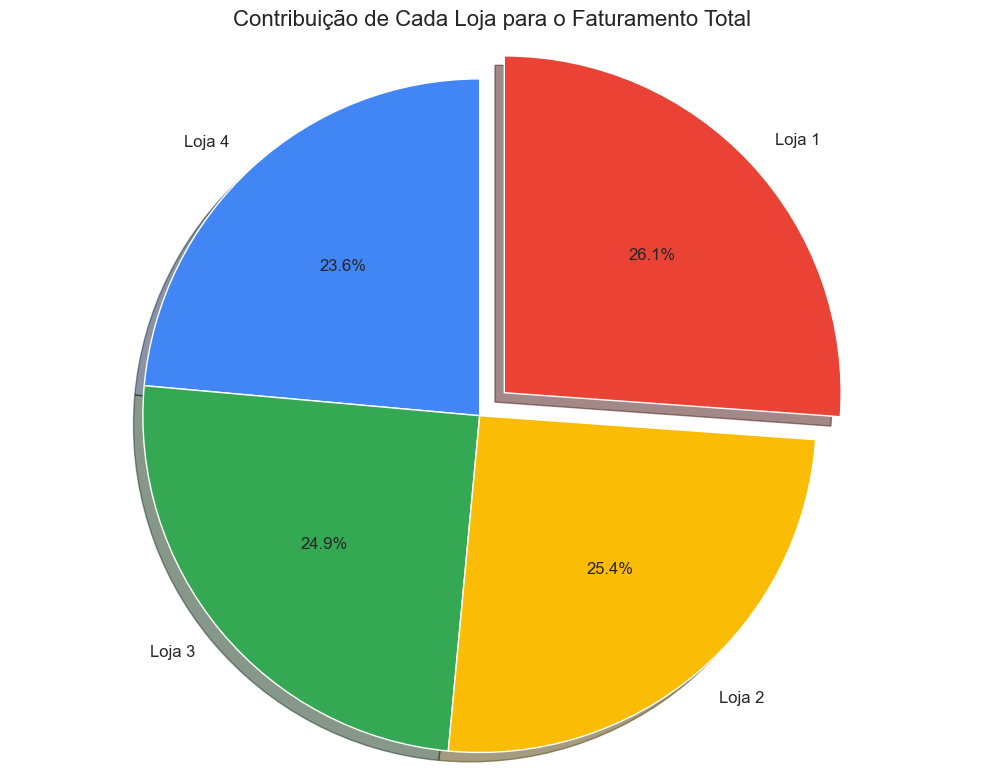

In [18]:
# Criando um gráfico de pizza para visualizar a contribuição de cada loja para o faturamento total
plt.figure(figsize=(10, 8))
explode = [0, 0, 0, 0.1]  # Destacando a Loja 4

# Ordenando os dados para que a Loja 4 seja a última (para o explode funcionar corretamente)
contrib_data = metricas_df.sort_values('Loja', ascending=False)

plt.pie(contrib_data['Contribuição para Faturamento (%)'], 
        labels=contrib_data['Loja'], 
        autopct='%1.1f%%',
        startangle=90, 
        explode=explode,
        colors=cores,
        shadow=True,
        wedgeprops={'edgecolor': 'white', 'linewidth': 1})

plt.title('Contribuição de Cada Loja para o Faturamento Total', fontsize=16)
plt.axis('equal')  # Para garantir que o gráfico seja um círculo
plt.tight_layout()
plt.show()

## 6.4 Recomendação Estratégica

Com base na análise dos dados de desempenho das quatro lojas da Alura Store, recomendamos que o Sr. João venda a **Loja 4** pelos seguintes motivos:

1. **Desempenho Financeiro Inferior:** A Loja 4 apresenta o menor faturamento total (R$ 1.384.497,58), aproximadamente 9,8% abaixo da média das outras lojas. Esta diferença significativa indica um desempenho comercial consistentemente inferior.

2. **Contribuição Limitada para o Negócio:** A Loja 4 contribui com apenas 23,6% para o faturamento total da rede, a menor participação entre todas as lojas.

3. **Avaliação de Clientes Mediana:** Embora não seja a pior em termos de avaliação de clientes, a Loja 4 apresenta um desempenho mediano (4,00 estrelas), não oferecendo uma vantagem competitiva significativa neste aspecto.

4. **Vantagem de Frete Insuficiente:** Apesar de ter o menor custo médio de frete (R$ 31,28), esta vantagem operacional não é suficiente para compensar o baixo desempenho em faturamento. A economia em frete não se traduz em maior lucratividade geral.

5. **Oportunidade de Reinvestimento:** A venda da Loja 4 proporcionaria capital para investimento em um novo negócio potencialmente mais lucrativo, ou para fortalecer as operações das lojas restantes que demonstram melhor desempenho.

6. **Consolidação Estratégica:** A eliminação da unidade de menor desempenho permitiria uma consolidação estratégica do negócio, concentrando recursos e esforços gerenciais nas lojas mais rentáveis.

Esta recomendação está alinhada com princípios de gestão estratégica que priorizam a alocação eficiente de recursos e a maximização do retorno sobre o investimento. A venda da Loja 4 representa a melhor oportunidade para o Sr. João otimizar seu portfólio de negócios e posicionar-se para um crescimento futuro mais sustentável.